In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter

In [48]:
#Transform
transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [77]:
train_data = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=transform)
#val_data = torchvision.datasets.SVHN(root='./data', split='extra', download=True, transform=transform)
test_data = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=transform)

Using downloaded and verified file: ./data\train_32x32.mat
Using downloaded and verified file: ./data\test_32x32.mat


In [78]:
print(len(train_data))
#print(len(val_data))
print(len(test_data))

#train = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

#extra = torch.utils.data.DataLoader(val_data, batch_size=4, shuffle=True, num_workers=2)

#test = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

data = torch.utils.data.ConcatDataset([train_data, val_data])

train_size = round(0.8*len(train_data))
val_size = round(0.2*len(train_data))
print(train_size)
print(val_size)
train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])





73257
26032
58606
14651


In [81]:
print(len(trainloader))

#Make dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

val_loader = torch.utils.data.DataLoader(val_data, batch_size=4, shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=True, num_workers=2)

14652


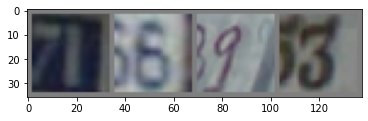

In [82]:
#Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))
# print labels
#print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [93]:
class cnn_model(nn.Module):

    def __init__(self, num_classes: int = 1000) -> None:
        super(cnn_model, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=2, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=2, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=2, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(32, 64, kernel_size=4, stride=2,padding=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2,padding=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2,padding=2),
            nn.ReLU(inplace=True),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [94]:
cnn = cnn_model(num_classes = 10)
cnn.load_state_dict(torch.load('myCNN'))
cnn.eval()

cnn_model(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (10): ReLU(inplace=True)
    (11): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (12): ReLU(inplace=True)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=1024

In [95]:
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'
    
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False

#Model description
model.eval()
# Add on classifier
cnn.features[0] = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=2, stride=1, padding=0))



#Loss
criterion = nn.CrossEntropyLoss()

#Optimizer(SGD)
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

epochs = 5

In [96]:
cnn.eval()
cnn.to(device)

cnn_model(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1))
    )
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (10): ReLU(inplace=True)
    (11): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
    (12): ReLU(inplace=True)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_fea

In [97]:
import gc
torch.cuda.empty_cache()
#del variables
gc.collect()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |    1140 MB |    1303 MB |  122472 GB |  122471 GB |\n|       from large pool |    1134 MB |    1296 MB |  117065 GB |  117064 GB |\n|       from small pool |       6 MB |       9 MB |    5407 GB |    5407 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |    1140 MB |    1303 MB |  122472 GB |  122471 GB |\n|       from large pool |    1134 MB |    1296 MB |

In [98]:
# set writer for tensorboard
writer = SummaryWriter()
epoch_data = []
train_epoch = []
val_epoch = []
for epoch in range(epochs):  # loop over the dataset multiple times
    epoch_data.append(epoch + 1)
    running_loss = 0.0
    running_loss_val = 0.0
    for i, data in enumerate(trainloader, 0):
        print('\rProgress for training: [{}/{}] Epoch progrss: [{}/{}]'.format(epoch+1, epochs, i+1, len(trainloader)), end='', flush=True)
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = cnn(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        writer.add_scalar("Loss/train_pretrained", loss, epoch)
        # print statistics
        running_loss += loss.item() / len(trainloader)
    for i, data in enumerate(val_loader,0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # forward only
        output = cnn(inputs)
        loss = criterion(output, labels)

        # print statistics
        running_loss_val += loss.item() / len(val_loader)
    train_epoch.append(running_loss)
    val_epoch.append(running_loss_val)
    

print('\nFinished Training of CNN')
writer.flush()
writer.close()

Progress for training: [5/5] Epoch progrss: [14652/14652]Finished Training of CNN


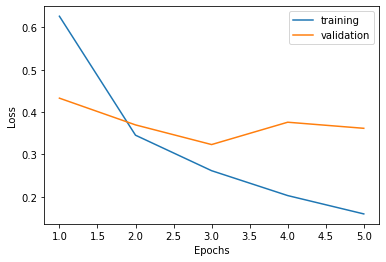

In [99]:
plt.plot(range(1,epochs+1), train_epoch,label='training')
plt.plot(range(1,epochs+1),val_epoch, label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [100]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(test_loader):
        print('\rEpoch progrss: [{}/{}]'.format(i+1, len(test_loader)), end='', flush=True)

        images, labels = data[0].to(device), data[1].to(device)
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('\nAccuracy of the network on the test images: {}%'.format(
    100.0 * correct / total))

Epoch progrss: [6508/6508]
Accuracy of the network on the test images: 89.27089735709896%
